### <span style="color:darkblue"> Lab Assignement 3: Statistical Foundation and Decision Trees </span>
- due Friday, November 3 @1:15PM
- post to your Google Drive folder using the file name: LASTNAME_lab3.ipynb

#### TYPE YOUR FULL NAME HERE: 

Riva Lam



##### Grade (to be entered by TA):

---
### <span style="color:darkblue"> Question 1.

(MDSR Exercise 7.1) Calculate and interpret a 95% confidence interval for the mean age of mothers from the Gestation data set from the mosaicData package.

#### SOLUTION:

In [27]:
library(mosaic) 
library(dplyr)
library(mosaicData)
AGE<-filter(Gestation, !is.na(age))
mean(AGE$age)
confint(lm(Gestation$age~1),data=AGE)


[1] 27.25527

,2.5 %,97.5 %
(Intercept),26.93238,27.57815


#### Solution in words goes here

Through repeated sampling, then we are 95% confident that the interval (26.93238	27.57815)
will contain the mean age of mothers from the Gestation data set from the mosaicData package.



---
### <span style="color:darkblue"> Question 2.

(MDSR Exercise 7.2) Use the bootstrap to generate and interpret a 95% confidence interval for the median age of mothers for the Gestation data set from the mosaicData package.

#### SOLUTION:

In [37]:
AGE<-filter(Gestation, !is.na(age))
library(dplyr)
median(AGE$age)
Bootstrap_trials <- do(5000) * median( ~ age, data = resample(AGE))
#favstats( ~ median, data = Bootstrap_trials)
confint(Bootstrap_trials,data= AGE)

[1] 26

name,lower,upper,level,method,estimate
median,26,27,0.95,percentile,26


#### Solution in words goes here


Through repeated sampling, then we are 95% confident that the interval will contain the median
age of mothers from the Gestation data set from the mosaicData package.


---
### <span style="color:darkblue"> Question 3.

(MDSR Exercise 7.3) Use the bootstrap to generate a 95% confidence interval for the regression parameters in a model for weight as a function of age for the Gestation data frame from the mosaicData package.

#### SOLUTION:


In [38]:
library(dplyr)
AGE<-filter(Gestation, !is.na(age))
lm(wt~age,data=Gestation)
Bootstrap_trials12 <- do(5000) * lm( wt~ age, data = resample(AGE))
confint(Bootstrap_trials12,data= AGE)



Call:
lm(formula = wt ~ age, data = Gestation)

Coefficients:
(Intercept)          age  
   116.6835       0.1062  


name,lower,upper,level,method,estimate
Intercept,1.117897e+02,1.217100e+02,0.95,percentile,1.166835e+02
age,-7.598115e-02,2.879156e-01,0.95,percentile,1.062233e-01
sigma,1.742026e+01,1.903618e+01,0.95,percentile,1.824797e+01
r.squared,2.441127e-06,8.362527e-03,0.95,percentile,1.132238e-03
F,3.007476e-03,1.038952e+01,0.95,percentile,1.396499e+00


#### Solution in words goes here


Through repeated sampling, then we are 95% confident that the interval (1.117897e+02,	1.217100e+02) will contain the true intercept. 
 
Through repeated sampling, we are 95% confident that the  interval  (-7.598115e-02, 2.879156e-01) will contain the true slope. 

---
### <span style="color:darkblue"> Question 4.

(MDSR Exercise 7.7) Smoking and mortality: The Whickham data set in the mosaicData package includes data on age, smoking, and mortality from a one-in-six survey of the electoral roll in Whickham, a mixed urban and rural district near Newcastle upon Tyne, in the United Kingdom. The survey was conducted in 1972–1974 to study heart disease and thyroid disease. A follow-up on those in the survey was conducted twenty years later. Describe the association between smoking status and mortality in this study. Be sure to consider the role of age as a possible confounding factor.

#### SOLUTION:


In [31]:
library(mdsr)
library(mosaic)
library(dplyr)
library(ggplot2)
#BB<-as.numeric(Whickham$outcome)

#mutate(Whickham,as.numeric(outcome)
AA<-mutate(Whickham, noutcome =as.numeric(outcome),nsmoker=as.numeric(smoker))
NOCONFOUNDING<- lm(noutcome ~nsmoker, data = AA)
msummary(NOCONFOUNDING)

CONFOUNDINGINCLUDED<- lm(noutcome ~nsmoker+ age, data = AA)
msummary(CONFOUNDINGINCLUDED)



            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38958    0.03798  36.584  < 2e-16 ***
nsmoker     -0.07538    0.02489  -3.028  0.00251 ** 

Residual standard error: 0.4482 on 1312 degrees of freedom
Multiple R-squared:  0.006941,	Adjusted R-squared:  0.006184 
F-statistic: 9.171 on 1 and 1312 DF,  p-value: 0.002507

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5379200  0.0417885  12.872   <2e-16 ***
nsmoker     -0.0104743  0.0195768  -0.535    0.593    
age          0.0161555  0.0005581  28.949   <2e-16 ***

Residual standard error: 0.3502 on 1311 degrees of freedom
Multiple R-squared:  0.3942,	Adjusted R-squared:  0.3933 
F-statistic: 426.5 on 2 and 1311 DF,  p-value: < 2.2e-16

#### Solution in words goes here
The association between smoker status and mortality can be expressed by the adjusted R^2. In this case, the R^(2) = 0.006  means that the model explains 0.6 % of the variability in whether or not the person is alive or dead (morality). On the other hand, the adjusted R^(2)= .3933 is for the model that also includes the confounding variable ( age). This model explains 39.33% of the variability in whether or not the person is alive or dead.


---
### <span style="color:darkblue"> Question 5.

(MDSR Exercise 8.1) The ability to get a good night’s sleep is correlated with many positive health outcomes. The NHANES data set contains a binary variable SleepTrouble that indicates whether each person has trouble sleeping. For this problem, you will need to install the NHANES package using the install.packages() function, and then call it using the library() function. The name of the dataframe is NHANES.

Using a decision tree:

1. Build a classifier for SleepTrouble
3. Make an appropriate visualization of the model
4. Interpret the results. What have you learned about people’s sleeping habits?
You may use whatever variable you like, except for SleepHrsNight. 

#### SOLUTION:



The downloaded binary packages are in
	/var/folders/nw/47dlbfmj3g14bkrlz_z6m7vh0000gn/T//RtmpO34Mtb/downloaded_packages
Observations: 10,000
Variables: 76
$ ID               <int> 51624, 51624, 51624, 51625, 51630, 51638, 51646, 5...
$ SurveyYr         <fctr> 2009_10, 2009_10, 2009_10, 2009_10, 2009_10, 2009...
$ Gender           <fctr> male, male, male, male, female, male, male, femal...
$ Age              <int> 34, 34, 34, 4, 49, 9, 8, 45, 45, 45, 66, 58, 54, 1...
$ AgeDecade        <fctr>  30-39,  30-39,  30-39,  0-9,  40-49,  0-9,  0-9,...
$ AgeMonths        <int> 409, 409, 409, 49, 596, 115, 101, 541, 541, 541, 7...
$ Race1            <fctr> White, White, White, Other, White, White, White, ...
$ Race3            <fctr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ Education        <fctr> High School, High School, High School, NA, Some C...
$ MaritalStatus    <fctr> Married, Married, Married, NA, LivePartner, NA, N...
$ HHIncome         <fctr> 25000-34999, 25000-34999, 25

ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51625,2009_10,male,4,0-9,49,Other,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
51630,2009_10,female,49,40-49,596,White,NA,Some College,LivePartner,⋯,No,NA,Yes,Yes,12,10,1,Yes,Heterosexual,NA
51638,2009_10,male,9,0-9,115,White,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 8000

[1] 2000

SleepTrouble
    No    Yes   <NA> 
58.075 19.825 22.100 

n=6232 (1768 observations deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 6232 1586 No (0.7455071 0.2544929)  
   2) SleepHrsNight>=5.5 5463 1213 No (0.7779608 0.2220392) *
   3) SleepHrsNight< 5.5 769  373 No (0.5149545 0.4850455)  
     6) DaysPhysHlthBad< 8.5 598  254 No (0.5752508 0.4247492)  
      12) Depressed=None 449  165 No (0.6325167 0.3674833) *
      13) Depressed=Several,Most 149   60 Yes (0.4026846 0.5973154)  
        26) HHIncome=35000-44999,75000-99999 22    3 No (0.8636364 0.1363636) *
        27) HHIncome= 0-4999, 5000-9999,10000-14999,15000-19999,20000-24999,25000-34999,45000-54999,55000-64999,65000-74999,more 99999 127   41 Yes (0.3228346 0.6771654) *
     7) DaysPhysHlthBad>=8.5 171   52 Yes (0.3040936 0.6959064) *

n=6232 (1768 observations deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 6232 1586 No (0.7455071 0.2544929)  
   2) SleepHrsNight>=5.5 5463 1213 No (0.7779608 0.2220392) *
   3) SleepHrsNight< 5.5 769  373 No (0.5149545 0.4850455)  
     6) DaysPhysHlthBad< 8.5 600  255 No (0.5750000 0.4250000)  
      12) Depressed=None 461  174 No (0.6225597 0.3774403) *
      13) Depressed=Several,Most 139   58 Yes (0.4172662 0.5827338) *
     7) DaysPhysHlthBad>=8.5 169   51 Yes (0.3017751 0.6982249) *


Classification tree:
rpart(formula = form, data = train)

Variables actually used in tree construction:
[1] DaysPhysHlthBad Depressed       SleepHrsNight  

Root node error: 1586/6232 = 0.25449

n=6232 (1768 observations deleted due to missingness)

        CP nsplit rel error  xerror     xstd
1 0.021122      0   1.00000 1.00000 0.021681
2 0.014502      2   0.95776 0.96658 0.021437
3 0.010000      3   0.94325 0.95334 0.021337

  There is a binary version available but the source version is later:
         binary source needs_compilation
partykit  1.0-5  1.1-1              TRUE



installing the source package ‘partykit’



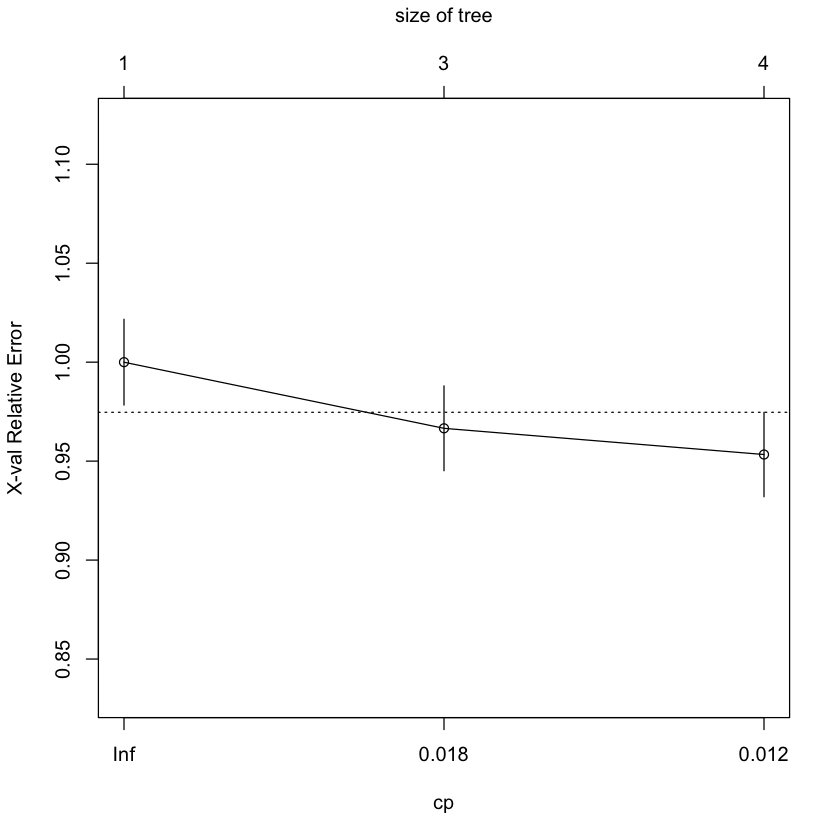

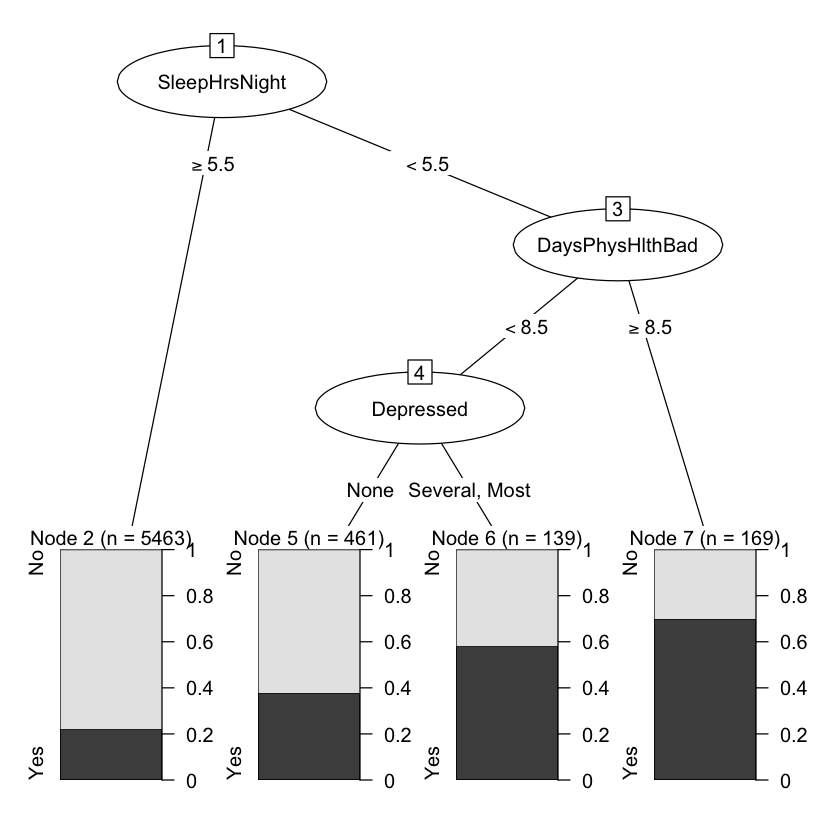

In [39]:
library(mosaic)
library(mdsr)
library(dplyr)
library(ggplot2)
install.packages("NHANES", repos='http://cran.us.r-project.org')
library(NHANES)
glimpse(NHANES)
set.seed(364) 
n <- nrow(NHANES) 
head(NHANES)
test_idx <- sample.int(n, size = round(0.2 * n)) 
train <- NHANES[-test_idx, ] 
nrow(train)
test <- NHANES[test_idx, ]
nrow(test) 
library(mosaic)
tally(~SleepTrouble, data = train, format = "percent")
library(rpart) 
rpart(SleepTrouble ~ ., data = train)

form <- as.formula("SleepTrouble ~ SleepHrsNight + DaysPhysHlthBad + Depressed + HHIncome")
mod_tree <- rpart(form, data = train) 
mod_tree
printcp(mod_tree)
plotcp(mod_tree)

install.packages("partykit", repos='http://cran.us.r-project.org')
library(partykit) 
plot(as.party(mod_tree))

#### Solution in words goes here

What have you learned about people’s sleeping habits?
You may use whatever variable you like, except for SleepHrsNight. 

The SleepHrsNight is the most predictive variable of people's sleeping habits. DaysPhysHlthBad is the next predictive variable of people's sleeping habits.

The predicted probability of participants' physical health being poor for fewer than 8.5 days is about 43%, while the predicted probability of the participants being good for fewer than 8.5 days is about 57%. The predicted probability of participants' physical health being poor for 8.5 days or more is about 70%, while the predicted probability of the participants being in good physical health of 8.5 days or more is approx. 30%. 


In [41]:
?NHANES